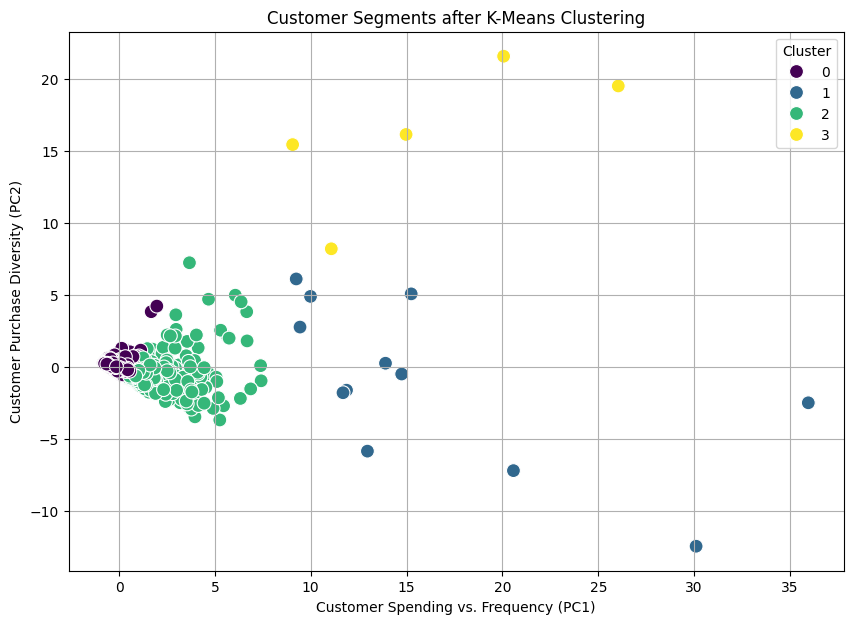

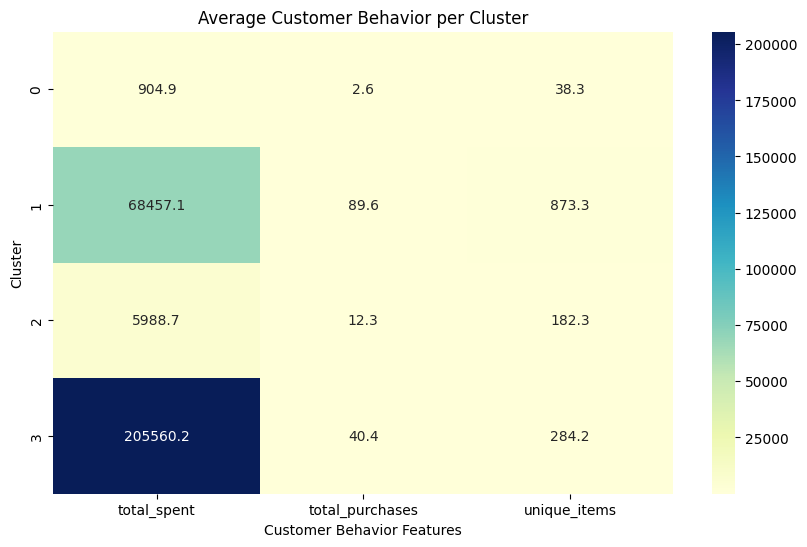

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Load dataset
data = pd.read_csv('9. Customer Segmentation in E-commerce.csv')

# Step 2: Clean the data
# Filter out rows with non-positive quantities or unit prices
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)].copy()

# Create 'TotalPrice' feature: Quantity * UnitPrice
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Step 3: Feature engineering
# Aggregate data by 'CustomerID' to get total spent, total purchases, and unique items
customer_data = data.groupby('CustomerID').agg(
    total_spent=('TotalPrice', 'sum'),  # Total amount spent by each customer
    total_purchases=('InvoiceNo', 'nunique'),  # Number of unique invoices
    unique_items=('StockCode', 'nunique')  # Number of unique items purchased
).reset_index()

# Step 4: Scale the data
# Standardize features to have zero mean and unit variance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['total_spent', 'total_purchases', 'unique_items']])

# Step 5: Apply K-means clustering
# Use K-Means to segment customers into 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 6: Visualize clusters with PCA
# Reduce data to 2 components using PCA for 2D visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
customer_data['PCA1'], customer_data['PCA2'] = pca_data[:, 0], pca_data[:, 1]

# Plot the PCA scatter plot to visualize customer clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=customer_data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title("Customer Segments after K-Means Clustering")
plt.xlabel("Customer Spending vs. Frequency (PC1)")
plt.ylabel("Customer Purchase Diversity (PC2)")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Step 7: Visualize average behavior per cluster with a heatmap
# Calculate the average feature values for each cluster
cluster_summary = customer_data.groupby('Cluster')[['total_spent', 'total_purchases', 'unique_items']].mean().round(1)

# Plot a heatmap of average customer behavior per cluster
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Average Customer Behavior per Cluster')
plt.xlabel('Customer Behavior Features')
plt.ylabel('Cluster')
plt.show()
